In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for better-looking plots
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (14, 6)


In [2]:
# Read the combined articles CSV
df = pd.read_csv('data/news/all_articles_combined.csv')

# Display basic info
print(f"Total articles: {len(df)}")
print(f"\nSources: {df['source'].unique()}")
print(f"\nDate range: {df['date'].min()} to {df['date'].max()}")
df.head()


Total articles: 13875

Sources: ['cnn.com' 'foxnews.com']

Date range: 2021/11 to 2025/11


,uuid,title,description,keywords,snippet,url,image_url,language,published_at,source,categories,relevance_score,date
0,ab6b83dc-ff5b-4e93-a2bf-d8e78a2f62bb,"Judge vacates death sentences of Pervis Payne,...",A Tennessee judge this week vacated the death ...,"us, Judge vacates death sentences of Pervis Pa...",(CNN) A Tennessee judge this week vacated the ...,https://www.cnn.com/2021/11/27/us/pervis-payne...,https://cdn.cnn.com/cnnnext/dam/assets/2111261...,en,2021-11-27T11:00:18.000000Z,cnn.com,['general'],9.289467,2021/11
1,9af6be7d-ef91-4735-abf3-d5ce205dd1f0,New York defund police candidate for Gov. has ...,A pro-defund the police official running for g...,NaN,A pro-defund the police elected official runni...,https://www.foxnews.com/us/new-york-defund-pol...,https://static.foxnews.com/foxnews.com/content...,en,2021-11-29T15:24:01.000000Z,foxnews.com,"['general', 'politics']",4.037125,2021/11
2,c91e6ab8-1268-4a47-82c7-983c622e6c51,Cuomo still collecting money from New York gov...,"Former New York Gov. Andrew Cuomo, who resigne...",NaN,NEW You can now listen to Fox News articles!\n...,https://www.foxnews.com/politics/cuomo-collect...,https://static.foxnews.com/foxnews.com/content...,en,2021-11-29T15:32:18.000000Z,foxnews.com,"['general', 'politics']",5.503952,2021/11
3,facbdc58-c1eb-4058-8703-8d363164e107,Remains of missing Wisconsin mom found months ...,A body matching the description of a Wisconsin...,NaN,A body matching the description of a Wisconsin...,https://www.foxnews.com/us/missing-wisconsin-m...,https://static.foxnews.com/foxnews.com/content...,en,2021-11-29T15:50:36.000000Z,foxnews.com,"['general', 'politics']",4.493310,2021/11
4,30606c52-0ecc-42d3-9ea5-599caccc5639,Chicago girl allegedly abducted near school by...,Chicago police are searching for a group of th...,NaN,A Chicago girl told police that three men in s...,https://www.foxnews.com/us/chicago-girl-abduct...,https://static.foxnews.com/foxnews.com/content...,en,2021-11-29T15:53:49.000000Z,foxnews.com,"['general', 'politics']",5.913184,2021/11


In [3]:
# Group by month and source, count articles
monthly_counts = df.groupby(['date', 'source']).size().reset_index(name='article_count')

# Pivot to have separate columns for each source
monthly_counts_pivot = monthly_counts.pivot(index='date', columns='source', values='article_count').fillna(0)

print("Monthly article counts by source:")
print(monthly_counts_pivot.head(10))


Monthly article counts by source:
source   cnn.com  foxnews.com
date                         
2021/11     12.0         72.0
2021/12     96.0        459.0
2022/01    136.0        454.0
2022/02    168.0        451.0
2022/03    201.0        440.0
2022/04    194.0        511.0
2022/05    193.0        483.0
2022/06    182.0        519.0
2022/07    135.0        324.0
2022/08    165.0          1.0


In [4]:
# Separate data by source
cnn_data = monthly_counts[monthly_counts['source'] == 'cnn.com'].copy()
fox_data = monthly_counts[monthly_counts['source'] == 'foxnews.com'].copy()

# Convert date to datetime for better plotting
cnn_data['date_dt'] = pd.to_datetime(cnn_data['date'], format='%Y/%m')
fox_data['date_dt'] = pd.to_datetime(fox_data['date'], format='%Y/%m')

print(f"CNN articles: {cnn_data['article_count'].sum()}")
print(f"Fox News articles: {fox_data['article_count'].sum()}")


CNN articles: 3530
Fox News articles: 10345


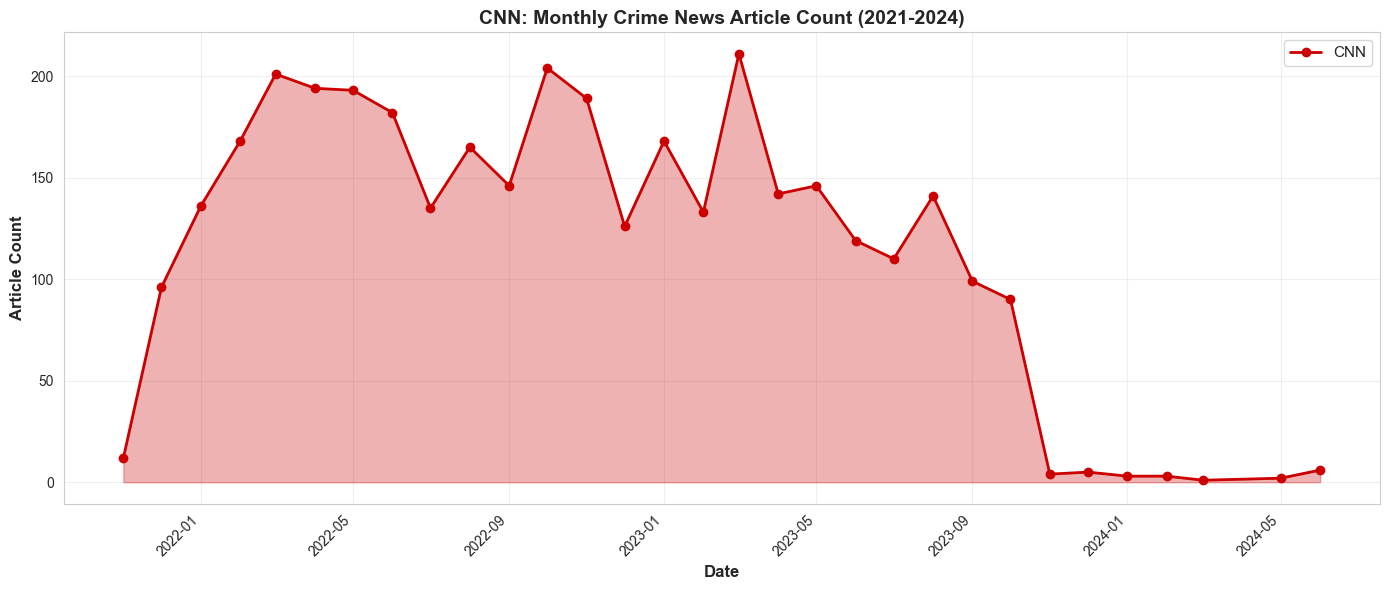

CNN Statistics:
  Mean: 113.87
  Median: 135.00
  Min: 1
  Max: 211


In [5]:
# Plot 1: CNN Monthly Article Count
fig, ax = plt.subplots(figsize=(14, 6))

ax.plot(cnn_data['date_dt'], cnn_data['article_count'], 
        marker='o', linewidth=2, markersize=6, color='#CC0000', label='CNN')
ax.fill_between(cnn_data['date_dt'], cnn_data['article_count'], alpha=0.3, color='#CC0000')

ax.set_xlabel('Date', fontsize=12, fontweight='bold')
ax.set_ylabel('Article Count', fontsize=12, fontweight='bold')
ax.set_title('CNN: Monthly Crime News Article Count (2021-2024)', fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3)
ax.legend(fontsize=11)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('plot/cnn_monthly_article_count.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"CNN Statistics:")
print(f"  Mean: {cnn_data['article_count'].mean():.2f}")
print(f"  Median: {cnn_data['article_count'].median():.2f}")
print(f"  Min: {cnn_data['article_count'].min()}")
print(f"  Max: {cnn_data['article_count'].max()}")


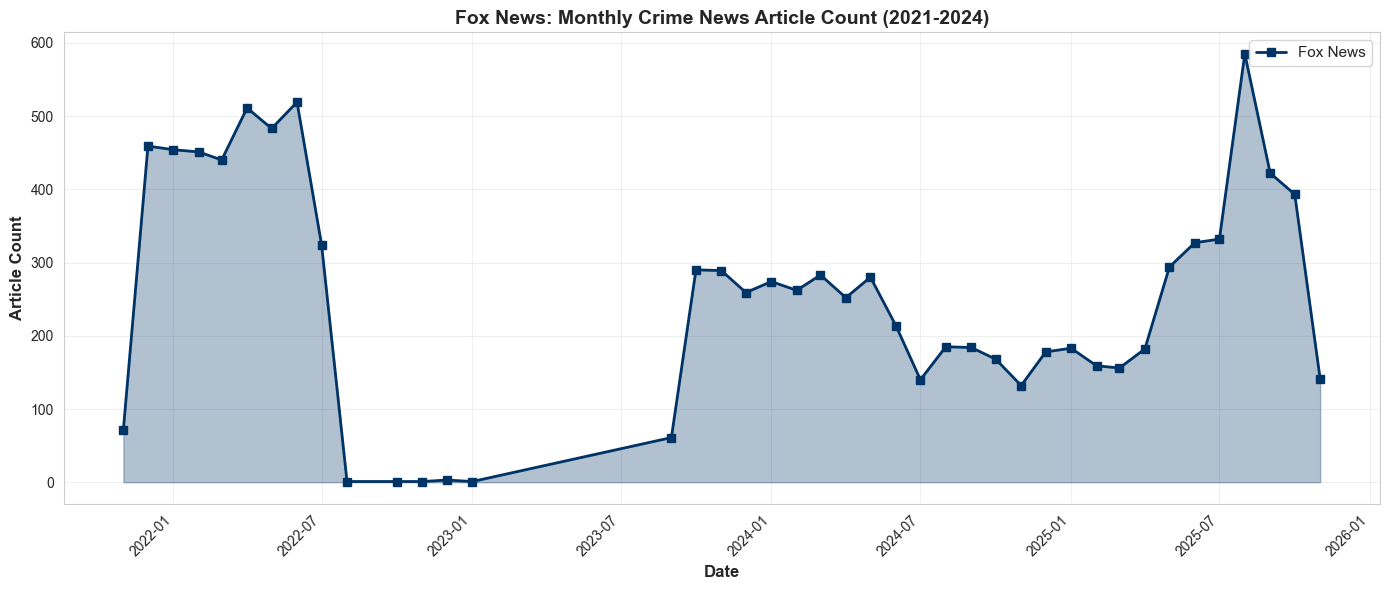

Fox News Statistics:
  Mean: 252.32
  Median: 259.00
  Min: 1
  Max: 585


In [6]:
# Plot 2: Fox News Monthly Article Count
fig, ax = plt.subplots(figsize=(14, 6))

ax.plot(fox_data['date_dt'], fox_data['article_count'], 
        marker='s', linewidth=2, markersize=6, color='#003366', label='Fox News')
ax.fill_between(fox_data['date_dt'], fox_data['article_count'], alpha=0.3, color='#003366')

ax.set_xlabel('Date', fontsize=12, fontweight='bold')
ax.set_ylabel('Article Count', fontsize=12, fontweight='bold')
ax.set_title('Fox News: Monthly Crime News Article Count (2021-2024)', fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3)
ax.legend(fontsize=11)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('plot/foxnews_monthly_article_count.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"Fox News Statistics:")
print(f"  Mean: {fox_data['article_count'].mean():.2f}")
print(f"  Median: {fox_data['article_count'].median():.2f}")
print(f"  Min: {fox_data['article_count'].min()}")
print(f"  Max: {fox_data['article_count'].max()}")
